In [1]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


First 5 rows of the dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   


<ipython-input-4-4ec8b777374d>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Unknown', inplace=True)
<ipython-input-4-4ec8b777374d>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.head(10).index, y=genres.head(10).values, palette='viridis')


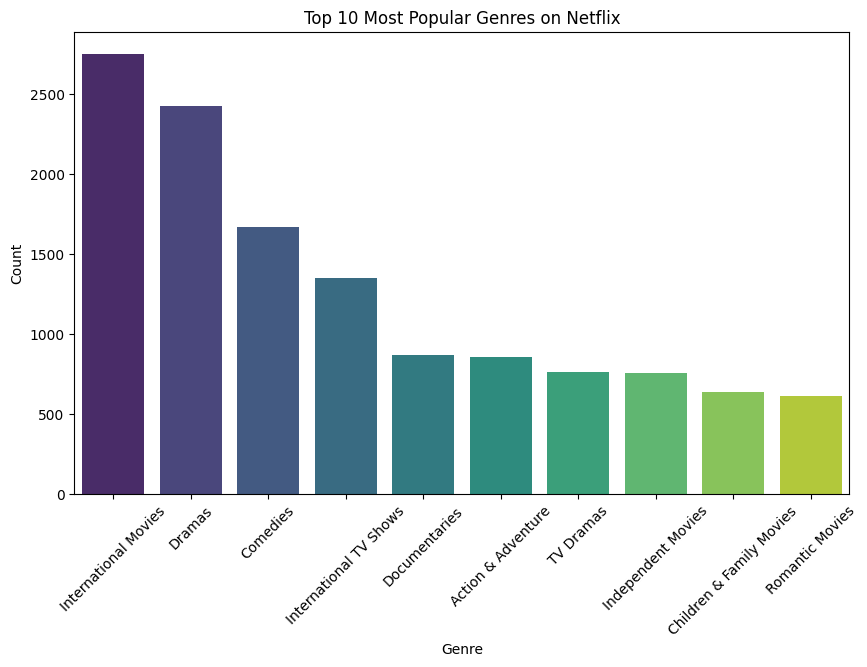

<ipython-input-4-4ec8b777374d>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='Blues')


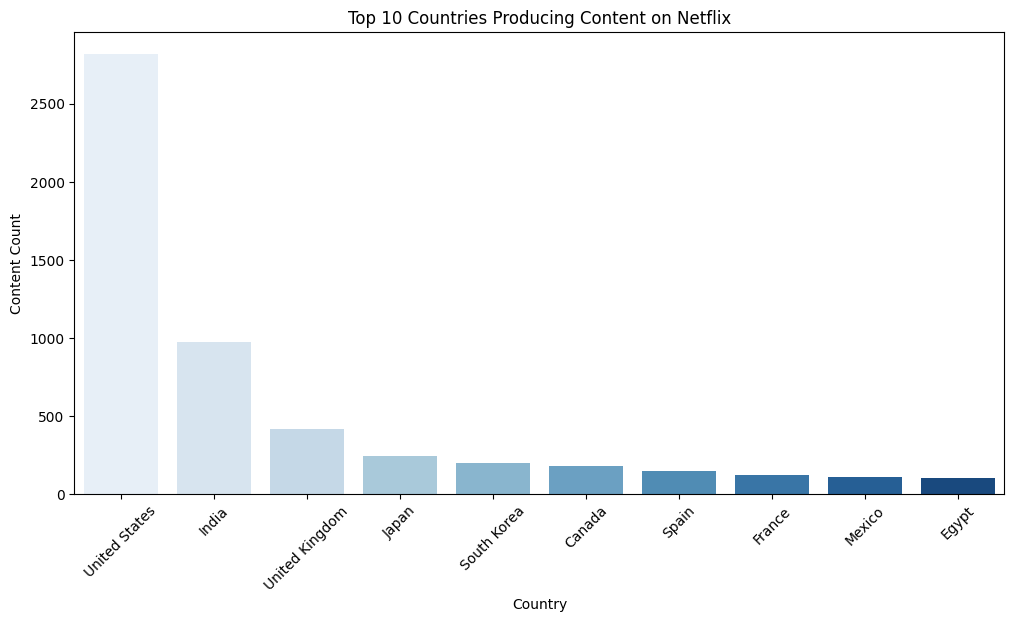

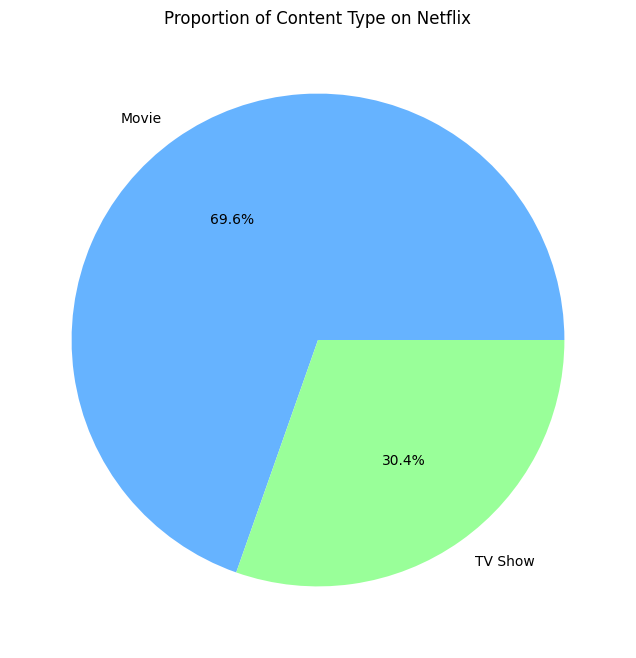

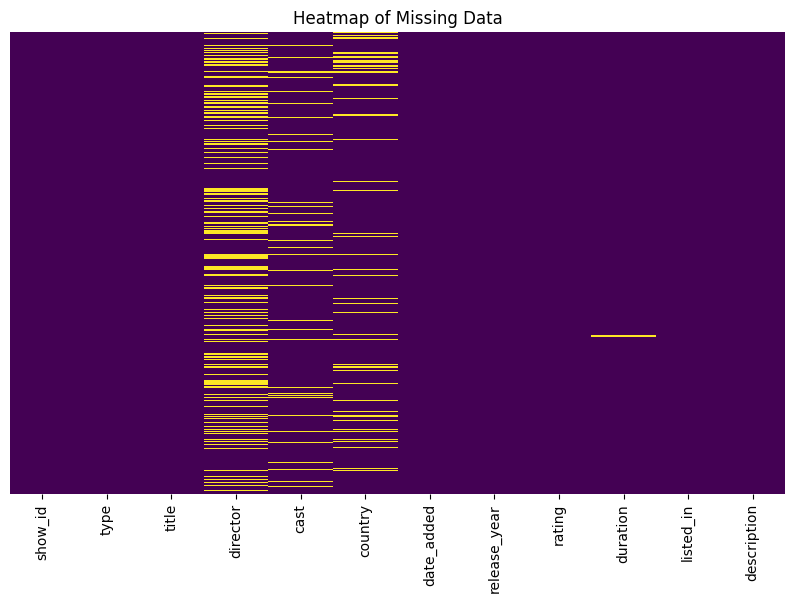

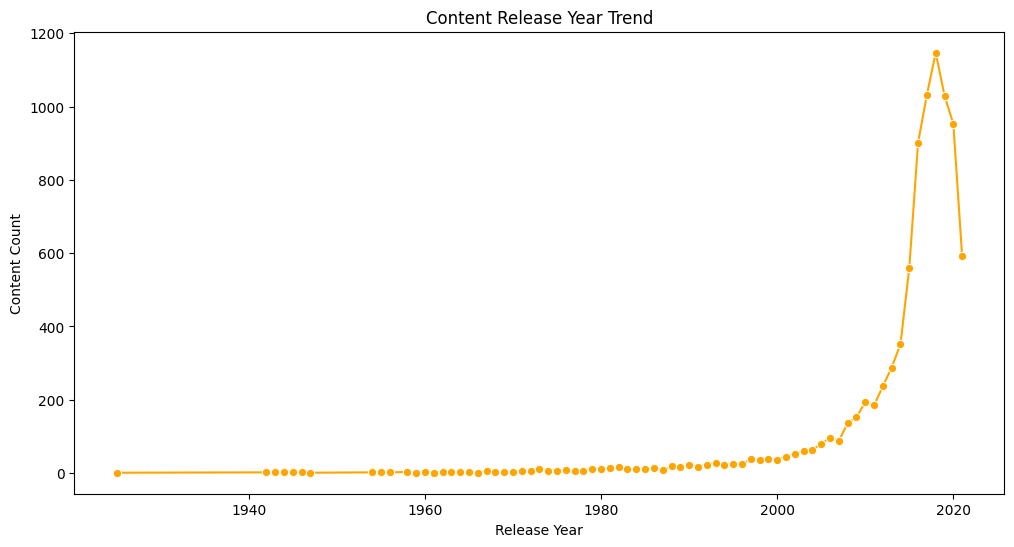

<ipython-input-4-4ec8b777374d>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')


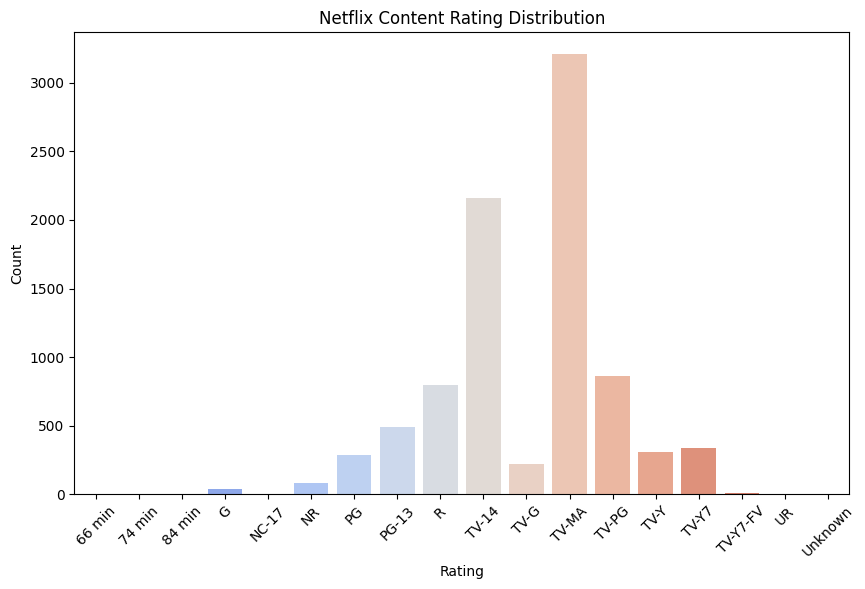

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nChecking for missing values:")
print(df.isnull().sum())

df.drop_duplicates(inplace=True)

df['rating'].fillna('Unknown', inplace=True)

df.dropna(subset=['title', 'type', 'release_year'], inplace=True)

print("\nDataset after cleaning:")
print(df.info())

df.to_csv('cleaned_netflix_data.csv', index=False)


content_type_counts = df['type'].value_counts()

genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts()

country_counts = df['country'].value_counts().head(10)

release_year_counts = df['release_year'].value_counts().sort_index()

rating_counts = df['rating'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.barplot(x=genres.head(10).index, y=genres.head(10).values, palette='viridis')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Blues')
plt.title('Top 10 Countries Producing Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Content Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Proportion of Content Type on Netflix')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, marker='o', color='orange')
plt.title('Content Release Year Trend')
plt.xlabel('Release Year')
plt.ylabel('Content Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Netflix Content Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
